In [44]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [45]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()         #show first 5 rows

name_wt  statuses_count  followers_count  friends_count  favourites_count  \
0  0.857143            1211               24             63                 6   
1  0.250000             313              101            173                48   
2  0.411765             247               51            382                50   
3  0.611111              41                3             36                 5   
4  0.600000           12341              770           1417                 0   

   listed_count  label  
0             6      0  
1             0      0  
2             4      0  
3             0      0  
4             8      1

In [46]:
dataset.shape[1]

7

In [47]:
#Combinig attributes into single list of tuples and using those features create a 2D matrix 

features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)

# data = dataset.as_matrix(columns = features)
data=dataset[features].values
#convert label column into 1D arrray

label = np.array(dataset['label'])


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

## table hidden layer vs accuracy

In [114]:
#initialisations
max_iterations=10
number_of_hidden_layers=0
step=2


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):
    model = Sequential()
    # tanh and relu -check
    
    model.add(Dense(15, input_dim=len(features), activation='relu'))
    
    for j in range(number_of_hidden_layers):
        model.add(Dense(8, activation='relu'))
            
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(5, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    model.fit(X_train, y_train, epochs=150, batch_size=150)

    # evaluate the keras model
    _,accuracy = model.evaluate(X_test, y_test)
    
    print("i",i)
    accuracy_list[i][0]=number_of_hidden_layers
    accuracy_list[i][1]=accuracy
#     accuracy_list.append[number_of_hidden_layers , accuracy]
    
    number_of_hidden_layers+=step

#     print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
5556/5556 [==============================] - 0s 38us/step - loss: 625.3718 - accuracy: 0.5119
Epoch 2/150
5556/5556 [==============================] - 0s 14us/step - loss: 292.0516 - accuracy: 0.5682
Epoch 3/150
5556/5556 [==============================] - 0s 16us/step - loss: 111.3676 - accuracy: 0.6123
Epoch 4/150
5556/5556 [==============================] - 0s 13us/step - loss: 74.2832 - accuracy: 0.6834
Epoch 5/150
5556/5556 [==============================] - 0s 15us/step - loss: 55.1060 - accuracy: 0.7529
Epoch 6/150
5556/5556 [==============================] - 0s 12us/step - loss: 41.5054 - accuracy: 0.8157
Epoch 7/150
5556/5556 [==============================] - 0s 13us/step - loss: 30.9987 - accuracy: 0.8409
Epoch 8/150
5556/5556 [==============================] - 0s 15us/step - loss: 23.6784 - accuracy: 0.8404
Epoch 9/150
5556/5556 [==============================] - 0s 17us/step - loss: 17.2648 - accuracy: 0.8359
Epoch 10/150
5556/5556 [============================

Epoch 79/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.8578 - accuracy: 0.9260
Epoch 80/150
5556/5556 [==============================] - 0s 13us/step - loss: 0.8705 - accuracy: 0.9190
Epoch 81/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.8400 - accuracy: 0.9226
Epoch 82/150
5556/5556 [==============================] - 0s 12us/step - loss: 0.9173 - accuracy: 0.9206
Epoch 83/150
5556/5556 [==============================] - 0s 13us/step - loss: 0.9587 - accuracy: 0.9165
Epoch 84/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.8636 - accuracy: 0.9246
Epoch 85/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.7657 - accuracy: 0.9271
Epoch 86/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.8361 - accuracy: 0.9230
Epoch 87/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.9325 - accuracy: 0.9188
Epoch 88/150
5556/5556 [==============================]

5556/5556 [==============================] - 0s 15us/step - loss: 0.3140 - accuracy: 0.9096
Epoch 84/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3215 - accuracy: 0.8918
Epoch 85/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4252 - accuracy: 0.8825
Epoch 86/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2986 - accuracy: 0.8979
Epoch 87/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2783 - accuracy: 0.9037
Epoch 88/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2930 - accuracy: 0.9015
Epoch 89/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2751 - accuracy: 0.9030
Epoch 90/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3010 - accuracy: 0.9015
Epoch 91/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2644 - accuracy: 0.9035
Epoch 92/150
5556/5556 [==============================] - 0s 31us/st

5556/5556 [==============================] - 0s 22us/step - loss: 0.3095 - accuracy: 0.9026
Epoch 87/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.2905 - accuracy: 0.9055
Epoch 88/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.4422 - accuracy: 0.8961
Epoch 89/150
5556/5556 [==============================] - 0s 29us/step - loss: 0.3124 - accuracy: 0.9073
Epoch 90/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.3216 - accuracy: 0.9062
Epoch 91/150
5556/5556 [==============================] - 0s 29us/step - loss: 0.4244 - accuracy: 0.9172
Epoch 92/150
5556/5556 [==============================] - 0s 23us/step - loss: 0.3569 - accuracy: 0.9048
Epoch 93/150
5556/5556 [==============================] - 0s 29us/step - loss: 0.2934 - accuracy: 0.9087
Epoch 94/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.2732 - accuracy: 0.9127
Epoch 95/150
5556/5556 [==============================] - 0s 26us/st

5556/5556 [==============================] - 0s 30us/step - loss: 0.1644 - accuracy: 0.9437
Epoch 91/150
5556/5556 [==============================] - 0s 30us/step - loss: 0.2577 - accuracy: 0.9131
Epoch 92/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.2271 - accuracy: 0.9208
Epoch 93/150
5556/5556 [==============================] - 0s 28us/step - loss: 0.2219 - accuracy: 0.9219
Epoch 94/150
5556/5556 [==============================] - 0s 30us/step - loss: 0.2016 - accuracy: 0.9318
Epoch 95/150
5556/5556 [==============================] - 0s 42us/step - loss: 0.1729 - accuracy: 0.9316
Epoch 96/150
5556/5556 [==============================] - 0s 39us/step - loss: 0.2203 - accuracy: 0.9264
Epoch 97/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.1670 - accuracy: 0.9420
Epoch 98/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.1685 - accuracy: 0.9393
Epoch 99/150
5556/5556 [==============================] - 0s 30us/st

5556/5556 [==============================] - 0s 37us/step - loss: 0.1342 - accuracy: 0.9483
Epoch 96/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.1402 - accuracy: 0.9487
Epoch 97/150
5556/5556 [==============================] - 0s 28us/step - loss: 0.1408 - accuracy: 0.9482
Epoch 98/150
5556/5556 [==============================] - 0s 32us/step - loss: 0.1363 - accuracy: 0.9489
Epoch 99/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.1768 - accuracy: 0.9429
Epoch 100/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.2215 - accuracy: 0.9158
Epoch 101/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2155 - accuracy: 0.9188
Epoch 102/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2052 - accuracy: 0.9230
Epoch 103/150
5556/5556 [==============================] - 0s 21us/step - loss: 0.1865 - accuracy: 0.9257
Epoch 104/150
5556/5556 [==============================] - 0s 23

5556/5556 [==============================] - 0s 35us/step - loss: 0.2028 - accuracy: 0.9428
Epoch 101/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.1739 - accuracy: 0.9431
Epoch 102/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.1714 - accuracy: 0.9456
Epoch 103/150
5556/5556 [==============================] - 0s 33us/step - loss: 0.1584 - accuracy: 0.9442
Epoch 104/150
5556/5556 [==============================] - 0s 29us/step - loss: 0.1567 - accuracy: 0.9467
Epoch 105/150
5556/5556 [==============================] - 0s 31us/step - loss: 0.1550 - accuracy: 0.9460
Epoch 106/150
5556/5556 [==============================] - 0s 32us/step - loss: 0.1518 - accuracy: 0.9496
Epoch 107/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.1386 - accuracy: 0.9552
Epoch 108/150
5556/5556 [==============================] - 0s 31us/step - loss: 0.1557 - accuracy: 0.9467
Epoch 109/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 34us/step - loss: 0.1462 - accuracy: 0.9514
Epoch 106/150
5556/5556 [==============================] - 0s 26us/step - loss: 0.1441 - accuracy: 0.9510
Epoch 107/150
5556/5556 [==============================] - 0s 26us/step - loss: 0.1372 - accuracy: 0.9519
Epoch 108/150
5556/5556 [==============================] - 0s 21us/step - loss: 0.1349 - accuracy: 0.9539
Epoch 109/150
5556/5556 [==============================] - 0s 28us/step - loss: 0.1323 - accuracy: 0.9561
Epoch 110/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.1552 - accuracy: 0.9455
Epoch 111/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.2285 - accuracy: 0.9127
Epoch 112/150
5556/5556 [==============================] - 0s 28us/step - loss: 0.1614 - accuracy: 0.9338
Epoch 113/150
5556/5556 [==============================] - 0s 24us/step - loss: 0.1482 - accuracy: 0.9415
Epoch 114/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 53us/step - loss: 0.1005 - accuracy: 0.9638
Epoch 111/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.1046 - accuracy: 0.9593
Epoch 112/150
5556/5556 [==============================] - 0s 32us/step - loss: 0.1017 - accuracy: 0.9615
Epoch 113/150
5556/5556 [==============================] - 0s 33us/step - loss: 0.1042 - accuracy: 0.9613
Epoch 114/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.0970 - accuracy: 0.9635
Epoch 115/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.0974 - accuracy: 0.9629
Epoch 116/150
5556/5556 [==============================] - 0s 33us/step - loss: 0.0956 - accuracy: 0.9651
Epoch 117/150
5556/5556 [==============================] - 0s 36us/step - loss: 0.0893 - accuracy: 0.9662
Epoch 118/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.0966 - accuracy: 0.9633
Epoch 119/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 35us/step - loss: 0.0779 - accuracy: 0.9752
Epoch 116/150
5556/5556 [==============================] - 0s 32us/step - loss: 0.0840 - accuracy: 0.9714
Epoch 117/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.0877 - accuracy: 0.9701
Epoch 118/150
5556/5556 [==============================] - 0s 38us/step - loss: 0.0804 - accuracy: 0.9721
Epoch 119/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.0863 - accuracy: 0.9710
Epoch 120/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.0836 - accuracy: 0.9737
Epoch 121/150
5556/5556 [==============================] - 0s 53us/step - loss: 0.0836 - accuracy: 0.9741
Epoch 122/150
5556/5556 [==============================] - 0s 44us/step - loss: 0.0896 - accuracy: 0.9710
Epoch 123/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.0810 - accuracy: 0.9725
Epoch 124/150
5556/5556 [==============================] - 0

Epoch 120/150
5556/5556 [==============================] - 0s 50us/step - loss: 0.0821 - accuracy: 0.9725
Epoch 121/150
5556/5556 [==============================] - 0s 36us/step - loss: 0.0785 - accuracy: 0.9762
Epoch 122/150
5556/5556 [==============================] - 0s 37us/step - loss: 0.0807 - accuracy: 0.9755
Epoch 123/150
5556/5556 [==============================] - 0s 38us/step - loss: 0.0781 - accuracy: 0.9755
Epoch 124/150
5556/5556 [==============================] - 0s 41us/step - loss: 0.0841 - accuracy: 0.9737
Epoch 125/150
5556/5556 [==============================] - 0s 42us/step - loss: 0.1251 - accuracy: 0.9563
Epoch 126/150
5556/5556 [==============================] - 0s 39us/step - loss: 0.0943 - accuracy: 0.9667
Epoch 127/150
5556/5556 [==============================] - 0s 37us/step - loss: 0.0763 - accuracy: 0.9762
Epoch 128/150
5556/5556 [==============================] - 0s 38us/step - loss: 0.0776 - accuracy: 0.9744
Epoch 129/150
5556/5556 [=====================

In [115]:
for i in range(len(accuracy_list)):
    print(accuracy_list[i][0],"\t",accuracy_list[i][1])

0 	 0.9366450905799866
2 	 0.9251260161399841
4 	 0.9229661822319031
6 	 0.9373649954795837
8 	 0.9532037377357483
10 	 0.9690424799919128
12 	 0.9805615544319153
14 	 0.9690424799919128
16 	 0.9784017205238342
18 	 0.9798415899276733


In [59]:
accuracy_list

[[0, 0.915766716003418],
 [2, 0.9380849599838257],
 [0, 0],
 [4, 0.945284366607666],
 [0, 0]]

0.9377559423446655

## Activation Functions(tanh vs relu)

In [129]:
model1 = Sequential()
# tanh and relu -check
#three hidden layers
model1.add(Dense(15, input_dim=len(features), activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=150, batch_size=150)
# evaluate the keras model
_,accuracy = model1.evaluate(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
5556/5556 [==============================] - 0s 80us/step - loss: 13.4189 - accuracy: 0.4464
Epoch 2/150
5556/5556 [==============================] - 0s 25us/step - loss: 3.6585 - accuracy: 0.4410
Epoch 3/150
5556/5556 [==============================] - 0s 24us/step - loss: 2.1265 - accuracy: 0.4645
Epoch 4/150
5556/5556 [==============================] - 0s 22us/step - loss: 1.5393 - accuracy: 0.4946
Epoch 5/150
5556/5556 [==============================] - 0s 21us/step - loss: 1.2475 - accuracy: 0.5175
Epoch 6/150
5556/5556 [==============================] - 0s 22us/step - loss: 1.0820 - accuracy: 0.5319
Epoch 7/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.9513 - accuracy: 0.5832
Epoch 8/150
5556/5556 [==============================] - 0s 21us/step - loss: 0.8602 - accuracy: 0.6003
Epoch 9/150
5556/5556 [==============================] - 0s 31us/step - loss: 0.7812 - accuracy: 0.6073
Epoch 10/150
5556/5556 [==============================] - 0s 22

5556/5556 [==============================] - 0s 27us/step - loss: 0.5852 - accuracy: 0.6481
Epoch 80/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.5851 - accuracy: 0.6470
Epoch 81/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.5844 - accuracy: 0.6483
Epoch 82/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.5843 - accuracy: 0.6478
Epoch 83/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5840 - accuracy: 0.6483
Epoch 84/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5842 - accuracy: 0.6479
Epoch 85/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.5835 - accuracy: 0.6503
Epoch 86/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6191 - accuracy: 0.6379
Epoch 87/150
5556/5556 [==============================] - 0s 18us/step - loss: 0.5941 - accuracy: 0.6370
Epoch 88/150
5556/5556 [==============================] - 0s 15us/st

## Number of Neurons in hidden layers

In [136]:
max_iterations=10
number_of_neurons=2
step=2


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):  
    model2 = Sequential()
    # tanh and relu -check
    #three hidden layers
    model2.add(Dense(15, input_dim=len(features), activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model2.fit(X_train, y_train, epochs=150, batch_size=150)
    # evaluate the keras model
    _,accuracy = model2.evaluate(X_test, y_test)

    accuracy_list[i][0]=number_of_neurons
    accuracy_list[i][1]=accuracy*100
#     print('Accuracy: %.2f' % (accuracy*100))
    print(accuracy_list[i][1])
    number_of_neurons += step

Epoch 1/150
5556/5556 [==============================] - 1s 103us/step - loss: 31.5399 - accuracy: 0.3517
Epoch 2/150
5556/5556 [==============================] - 0s 30us/step - loss: 1.5208 - accuracy: 0.4620
Epoch 3/150
5556/5556 [==============================] - 0s 18us/step - loss: 0.6933 - accuracy: 0.4991
Epoch 4/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.6932 - accuracy: 0.4991
Epoch 5/150
5556/5556 [==============================] - 0s 18us/step - loss: 0.6932 - accuracy: 0.4991
Epoch 6/150
5556/5556 [==============================] - 0s 32us/step - loss: 0.6932 - accuracy: 0.4991
Epoch 7/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.6931 - accuracy: 0.4991
Epoch 8/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.6931 - accuracy: 0.4991
Epoch 9/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6931 - accuracy: 0.4991
Epoch 10/150
5556/5556 [==============================] - 0s 1

5556/5556 [==============================] - 0s 14us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 80/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 81/150
5556/5556 [==============================] - 0s 26us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 82/150
5556/5556 [==============================] - 0s 23us/step - loss: 0.6930 - accuracy: 0.4885
Epoch 83/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.6930 - accuracy: 0.5047
Epoch 84/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 85/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 86/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 87/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.6930 - accuracy: 0.5011
Epoch 88/150
5556/5556 [==============================] - 0s 14us/st

Epoch 6/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6003 - accuracy: 0.8002
Epoch 7/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.5977 - accuracy: 0.7981
Epoch 8/150
5556/5556 [==============================] - 0s 27us/step - loss: 0.5990 - accuracy: 0.8002
Epoch 9/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.5896 - accuracy: 0.7910
Epoch 10/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.5814 - accuracy: 0.7932
Epoch 11/150
5556/5556 [==============================] - 0s 18us/step - loss: 0.5831 - accuracy: 0.7876
Epoch 12/150
5556/5556 [==============================] - 0s 23us/step - loss: 0.5738 - accuracy: 0.7838
Epoch 13/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5720 - accuracy: 0.7878
Epoch 14/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5698 - accuracy: 0.7937
Epoch 15/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 17us/step - loss: 0.3327 - accuracy: 0.8915
Epoch 85/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3504 - accuracy: 0.8803
Epoch 86/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3386 - accuracy: 0.8997
Epoch 87/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.3349 - accuracy: 0.8938
Epoch 88/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3325 - accuracy: 0.8992
Epoch 89/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3384 - accuracy: 0.8933
Epoch 90/150
5556/5556 [==============================] - 0s 13us/step - loss: 0.3342 - accuracy: 0.8994
Epoch 91/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3323 - accuracy: 0.8945
Epoch 92/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3396 - accuracy: 0.8988
Epoch 93/150
5556/5556 [==============================] - 0s 14us/st

Epoch 11/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.7160 - accuracy: 0.8837
Epoch 12/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6599 - accuracy: 0.8866
Epoch 13/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6295 - accuracy: 0.8873
Epoch 14/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5919 - accuracy: 0.8898
Epoch 15/150
5556/5556 [==============================] - 0s 14us/step - loss: 1.4664 - accuracy: 0.8497
Epoch 16/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.8409 - accuracy: 0.8699
Epoch 17/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4962 - accuracy: 0.8888
Epoch 18/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.4301 - accuracy: 0.8889
Epoch 19/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4182 - accuracy: 0.8891
Epoch 20/150
5556/5556 [==============================]

5556/5556 [==============================] - 0s 17us/step - loss: 0.2805 - accuracy: 0.9158
Epoch 90/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2902 - accuracy: 0.9113
Epoch 91/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2779 - accuracy: 0.9100
Epoch 92/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2690 - accuracy: 0.9129
Epoch 93/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2622 - accuracy: 0.9174
Epoch 94/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2594 - accuracy: 0.9195
Epoch 95/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.2946 - accuracy: 0.9150
Epoch 96/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3675 - accuracy: 0.9050
Epoch 97/150
5556/5556 [==============================] - 0s 14us/step - loss: 1.1953 - accuracy: 0.8657
Epoch 98/150
5556/5556 [==============================] - 0s 15us/st

5556/5556 [==============================] - 0s 15us/step - loss: 0.4127 - accuracy: 0.9037
Epoch 17/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3125 - accuracy: 0.9102
Epoch 18/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3302 - accuracy: 0.9149
Epoch 19/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2945 - accuracy: 0.9217
Epoch 20/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3616 - accuracy: 0.9176
Epoch 21/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2828 - accuracy: 0.9237
Epoch 22/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.3216 - accuracy: 0.9185
Epoch 23/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2633 - accuracy: 0.9293
Epoch 24/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2883 - accuracy: 0.9287
Epoch 25/150
5556/5556 [==============================] - 0s 14us/st

5556/5556 [==============================] - 0s 14us/step - loss: 0.2635 - accuracy: 0.9118
Epoch 22/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2599 - accuracy: 0.9136
Epoch 23/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.7175 - accuracy: 0.8947
Epoch 24/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.4622 - accuracy: 0.9024
Epoch 25/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5514 - accuracy: 0.8940
Epoch 26/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4417 - accuracy: 0.8961
Epoch 27/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4303 - accuracy: 0.8978
Epoch 28/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.3319 - accuracy: 0.8927
Epoch 29/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3070 - accuracy: 0.8927
Epoch 30/150
5556/5556 [==============================] - 0s 16us/st

5556/5556 [==============================] - 0s 14us/step - loss: 0.3053 - accuracy: 0.9235
Epoch 27/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2624 - accuracy: 0.9287
Epoch 28/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2713 - accuracy: 0.9314
Epoch 29/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2529 - accuracy: 0.9287
Epoch 30/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2896 - accuracy: 0.9258
Epoch 31/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2570 - accuracy: 0.9348
Epoch 32/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2203 - accuracy: 0.9408
Epoch 33/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2956 - accuracy: 0.9386
Epoch 34/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2947 - accuracy: 0.9303
Epoch 35/150
5556/5556 [==============================] - 0s 15us/st

5556/5556 [==============================] - 0s 14us/step - loss: 0.1573 - accuracy: 0.9550
Epoch 105/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2295 - accuracy: 0.9444
Epoch 106/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1831 - accuracy: 0.9507
Epoch 107/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.3019 - accuracy: 0.9546
Epoch 108/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.1252 - accuracy: 0.9582
Epoch 109/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1296 - accuracy: 0.9581
Epoch 110/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1149 - accuracy: 0.9608
Epoch 111/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1096 - accuracy: 0.9658
Epoch 112/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1109 - accuracy: 0.9606
Epoch 113/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 14us/step - loss: 10.3809 - accuracy: 0.8517
Epoch 32/150
5556/5556 [==============================] - 0s 14us/step - loss: 3.1229 - accuracy: 0.8594
Epoch 33/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.4439 - accuracy: 0.9141
Epoch 34/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4009 - accuracy: 0.9197
Epoch 35/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.7516 - accuracy: 0.8992
Epoch 36/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4621 - accuracy: 0.8960
Epoch 37/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3217 - accuracy: 0.9089
Epoch 38/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2862 - accuracy: 0.9194
Epoch 39/150
5556/5556 [==============================] - 0s 14us/step - loss: 2.1547 - accuracy: 0.8749
Epoch 40/150
5556/5556 [==============================] - 0s 14us/s

5556/5556 [==============================] - 0s 14us/step - loss: 0.3734 - accuracy: 0.9264
Epoch 110/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3868 - accuracy: 0.9266
Epoch 111/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3679 - accuracy: 0.9312
Epoch 112/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.3204 - accuracy: 0.9325
Epoch 113/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2994 - accuracy: 0.9327
Epoch 114/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2964 - accuracy: 0.9329
Epoch 115/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2791 - accuracy: 0.9348
Epoch 116/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2824 - accuracy: 0.9338
Epoch 117/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2742 - accuracy: 0.9363
Epoch 118/150
5556/5556 [==============================] - 0

5556/5556 [==============================] - 0s 14us/step - loss: 2.7748 - accuracy: 0.8553
Epoch 37/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.7495 - accuracy: 0.8670
Epoch 38/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.6673 - accuracy: 0.8625
Epoch 39/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5508 - accuracy: 0.8708
Epoch 40/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4929 - accuracy: 0.8672
Epoch 41/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.4191 - accuracy: 0.8767
Epoch 42/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4383 - accuracy: 0.8708
Epoch 43/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.4017 - accuracy: 0.8787
Epoch 44/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3671 - accuracy: 0.8799
Epoch 45/150
5556/5556 [==============================] - 0s 14us/st

5556/5556 [==============================] - 0s 14us/step - loss: 0.2479 - accuracy: 0.9143
Epoch 115/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2457 - accuracy: 0.9154
Epoch 116/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2426 - accuracy: 0.9120
Epoch 117/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2370 - accuracy: 0.9177
Epoch 118/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2460 - accuracy: 0.9176
Epoch 119/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2624 - accuracy: 0.9098
Epoch 120/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.2423 - accuracy: 0.9149
Epoch 121/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2340 - accuracy: 0.9143
Epoch 122/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2381 - accuracy: 0.9181
Epoch 123/150
5556/5556 [==============================] - 0

Epoch 119/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.1681 - accuracy: 0.9321
Epoch 120/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.2203 - accuracy: 0.9244
Epoch 121/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1879 - accuracy: 0.9195
Epoch 122/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1844 - accuracy: 0.9228
Epoch 123/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.1744 - accuracy: 0.9199
Epoch 124/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.1678 - accuracy: 0.9244
Epoch 125/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1680 - accuracy: 0.9289
Epoch 126/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1631 - accuracy: 0.9293
Epoch 127/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1637 - accuracy: 0.9318
Epoch 128/150
5556/5556 [=====================

5556/5556 [==============================] - 0s 16us/step - loss: 0.2266 - accuracy: 0.9298
Epoch 47/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2432 - accuracy: 0.9296
Epoch 48/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.1957 - accuracy: 0.9347
Epoch 49/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2023 - accuracy: 0.9339
Epoch 50/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.2047 - accuracy: 0.9350
Epoch 51/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.1877 - accuracy: 0.9413
Epoch 52/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.3411 - accuracy: 0.8951
Epoch 53/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5316 - accuracy: 0.8769
Epoch 54/150
5556/5556 [==============================] - 0s 14us/step - loss: 1.2975 - accuracy: 0.8981
Epoch 55/150
5556/5556 [==============================] - 0s 14us/st

In [137]:
for i in range(len(accuracy_list)):
    print(accuracy_list[i][0],"\t",accuracy_list[i][1])

2 	 50.395965576171875
4 	 89.3448531627655
6 	 91.21670126914978
8 	 92.51260161399841
10 	 95.032399892807
12 	 96.40029072761536
14 	 94.8164165019989
16 	 93.80849599838257
18 	 95.60835361480713
20 	 89.99280333518982


## Number of Ephocs

In [ ]:
max_iterations=100
number_of_ephocs=0
step=10


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):
    model1 = Sequential()

    model1.add(Dense(15, input_dim=len(features), activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model1.fit(X_train, y_train, epochs=number_of_ephocs, batch_size=150,validation_split=0.30)
    # evaluate the keras model
    number_of_ephocs+=step
    _,accuracy = model1.evaluate(X_test, y_test)

    print('Accuracy: %.2f' % (accuracy*100))

## Final Model

In [67]:
model1 = Sequential()
model1.add(Dense(15, input_dim=len(features), activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model1.fit(X_train, y_train, epochs=375, batch_size=150,validation_split=0.30,verbose=0)
# evaluate the keras model
_,accuracy = model1.evaluate(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))
plot(history)

Train on 3889 samples, validate on 1667 samples
Epoch 1/375
3889/3889 [==============================] - 0s 112us/step - loss: 14.8501 - accuracy: 0.6578 - val_loss: 1.0537 - val_accuracy: 0.8392
Epoch 2/375
3889/3889 [==============================] - 0s 30us/step - loss: 5.0218 - accuracy: 0.8876 - val_loss: 0.7260 - val_accuracy: 0.9148
Epoch 3/375
3889/3889 [==============================] - 0s 30us/step - loss: 3.1774 - accuracy: 0.9015 - val_loss: 0.6411 - val_accuracy: 0.9052
Epoch 4/375
3889/3889 [==============================] - 0s 30us/step - loss: 1.1398 - accuracy: 0.8807 - val_loss: 0.7855 - val_accuracy: 0.7912
Epoch 5/375
3889/3889 [==============================] - 0s 30us/step - loss: 0.6371 - accuracy: 0.9049 - val_loss: 0.5176 - val_accuracy: 0.9130
Epoch 6/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.5895 - accuracy: 0.8969 - val_loss: 0.5067 - val_accuracy: 0.8998
Epoch 7/375
3889/3889 [==============================] - 0s 29us/step - lo

3889/3889 [==============================] - 0s 25us/step - loss: 0.2249 - accuracy: 0.9439 - val_loss: 0.2300 - val_accuracy: 0.9400
Epoch 57/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.2147 - accuracy: 0.9437 - val_loss: 0.2780 - val_accuracy: 0.9334
Epoch 58/375
3889/3889 [==============================] - 0s 24us/step - loss: 0.2076 - accuracy: 0.9437 - val_loss: 0.1908 - val_accuracy: 0.9328
Epoch 59/375
3889/3889 [==============================] - 0s 23us/step - loss: 0.1834 - accuracy: 0.9470 - val_loss: 0.2505 - val_accuracy: 0.9364
Epoch 60/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.4111 - accuracy: 0.8897 - val_loss: 0.2161 - val_accuracy: 0.9100
Epoch 61/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.4389 - accuracy: 0.9113 - val_loss: 0.2061 - val_accuracy: 0.9214
Epoch 62/375
3889/3889 [==============================] - 0s 21us/step - loss: 0.2746 - accuracy: 0.9265 - val_loss: 0.1710 - val_a

Epoch 112/375
3889/3889 [==============================] - 0s 29us/step - loss: 0.1489 - accuracy: 0.9504 - val_loss: 0.2303 - val_accuracy: 0.9454
Epoch 113/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1488 - accuracy: 0.9486 - val_loss: 0.2417 - val_accuracy: 0.9424
Epoch 114/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1609 - accuracy: 0.9419 - val_loss: 0.2390 - val_accuracy: 0.9400
Epoch 115/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1555 - accuracy: 0.9457 - val_loss: 0.2144 - val_accuracy: 0.9418
Epoch 116/375
3889/3889 [==============================] - 0s 62us/step - loss: 0.1563 - accuracy: 0.9491 - val_loss: 0.2999 - val_accuracy: 0.9418
Epoch 117/375
3889/3889 [==============================] - 0s 60us/step - loss: 0.1578 - accuracy: 0.9486 - val_loss: 0.2727 - val_accuracy: 0.9406
Epoch 118/375
3889/3889 [==============================] - 0s 63us/step - loss: 0.1528 - accuracy: 0.9499 - val_

3889/3889 [==============================] - 0s 30us/step - loss: 0.1533 - accuracy: 0.9465 - val_loss: 0.1714 - val_accuracy: 0.9412
Epoch 168/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1604 - accuracy: 0.9473 - val_loss: 0.1703 - val_accuracy: 0.9418
Epoch 169/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1623 - accuracy: 0.9463 - val_loss: 0.1735 - val_accuracy: 0.9394
Epoch 170/375
3889/3889 [==============================] - 0s 41us/step - loss: 0.1468 - accuracy: 0.9493 - val_loss: 0.1667 - val_accuracy: 0.9388
Epoch 171/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1397 - accuracy: 0.9522 - val_loss: 0.1598 - val_accuracy: 0.9448
Epoch 172/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.1410 - accuracy: 0.9491 - val_loss: 0.1621 - val_accuracy: 0.9430
Epoch 173/375
3889/3889 [==============================] - 0s 23us/step - loss: 0.1591 - accuracy: 0.9473 - val_loss: 0.1764 -

3889/3889 [==============================] - 0s 24us/step - loss: 0.1395 - accuracy: 0.9504 - val_loss: 0.1523 - val_accuracy: 0.9460
Epoch 223/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.1331 - accuracy: 0.9511 - val_loss: 0.1573 - val_accuracy: 0.9478
Epoch 224/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.1327 - accuracy: 0.9529 - val_loss: 0.1493 - val_accuracy: 0.9490
Epoch 225/375
3889/3889 [==============================] - 0s 30us/step - loss: 0.1279 - accuracy: 0.9524 - val_loss: 0.1608 - val_accuracy: 0.9484
Epoch 226/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1274 - accuracy: 0.9511 - val_loss: 0.1532 - val_accuracy: 0.9466
Epoch 227/375
3889/3889 [==============================] - 0s 24us/step - loss: 0.1247 - accuracy: 0.9517 - val_loss: 0.1640 - val_accuracy: 0.9520
Epoch 228/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1393 - accuracy: 0.9527 - val_loss: 0.1696 -

3889/3889 [==============================] - 0s 23us/step - loss: 0.1363 - accuracy: 0.9532 - val_loss: 0.1501 - val_accuracy: 0.9526
Epoch 278/375
3889/3889 [==============================] - 0s 28us/step - loss: 0.1295 - accuracy: 0.9545 - val_loss: 0.1622 - val_accuracy: 0.9532
Epoch 279/375
3889/3889 [==============================] - 0s 25us/step - loss: 0.1193 - accuracy: 0.9563 - val_loss: 0.1345 - val_accuracy: 0.9520
Epoch 280/375
3889/3889 [==============================] - 0s 28us/step - loss: 0.1337 - accuracy: 0.9529 - val_loss: 0.1428 - val_accuracy: 0.9514
Epoch 281/375
3889/3889 [==============================] - 0s 30us/step - loss: 0.1356 - accuracy: 0.9542 - val_loss: 0.1476 - val_accuracy: 0.9556
Epoch 282/375
3889/3889 [==============================] - 0s 23us/step - loss: 0.1177 - accuracy: 0.9565 - val_loss: 0.1598 - val_accuracy: 0.9544
Epoch 283/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1119 - accuracy: 0.9591 - val_loss: 0.1684 -

3889/3889 [==============================] - 0s 23us/step - loss: 0.1232 - accuracy: 0.9594 - val_loss: 0.2187 - val_accuracy: 0.9508
Epoch 333/375
3889/3889 [==============================] - 0s 21us/step - loss: 0.1098 - accuracy: 0.9589 - val_loss: 0.2105 - val_accuracy: 0.9508
Epoch 334/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1141 - accuracy: 0.9617 - val_loss: 0.1914 - val_accuracy: 0.9544
Epoch 335/375
3889/3889 [==============================] - 0s 27us/step - loss: 0.1191 - accuracy: 0.9594 - val_loss: 0.2068 - val_accuracy: 0.9556
Epoch 336/375
3889/3889 [==============================] - 0s 21us/step - loss: 0.1356 - accuracy: 0.9573 - val_loss: 0.1991 - val_accuracy: 0.9532
Epoch 337/375
3889/3889 [==============================] - 0s 29us/step - loss: 0.1199 - accuracy: 0.9596 - val_loss: 0.2052 - val_accuracy: 0.9526
Epoch 338/375
3889/3889 [==============================] - 0s 26us/step - loss: 0.1147 - accuracy: 0.9609 - val_loss: 0.2110 -

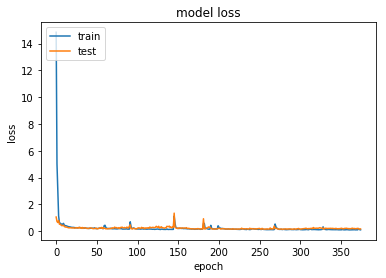

In [68]:
plot(history)

In [49]:
# label = model1.predict_classes(X_test)
# label

In [50]:
# np.reshape(X_test[test_case:test_case+1],(6,)).shape

In [51]:
y_predict =   model1.predict_classes(X_test)                #to store prediction of each test example


In [52]:
conf_matrix = confusion_matrix(y_test, y_predict)

In [53]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [54]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)
recall = (TP)/(TP + FN)

In [55]:
precision = (TP)/(TP + FP)

In [56]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)
#accuracy_score(y_test, y_predict)

In [57]:
print("------ CLASSIFICATION PERFORMANCE OF THE NEURAL NETWORKS MODEL ------ "\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


------ CLASSIFICATION PERFORMANCE OF THE NEURAL NETWORKS MODEL ------ 
 Recall :  97.57142857142857 %
 Precision :  97.15504978662874 %
 Accuracy :  97.33621310295176 %
 F-measure :  97.36279401282967 %


In [58]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [59]:
history.history['accuracy']

[0.67086655,
 0.75186425,
 0.834919,
 0.8580612,
 0.86783236,
 0.86628956,
 0.85703266,
 0.8616611,
 0.8665467,
 0.80560553,
 0.80740553,
 0.8824891,
 0.855747,
 0.8719465,
 0.89277446,
 0.88223195,
 0.8696323,
 0.8763178,
 0.88968885,
 0.8943173,
 0.9046027,
 0.9046027,
 0.91051686,
 0.9205451,
 0.925945,
 0.9244022,
 0.9174595,
 0.92260224,
 0.92183083,
 0.9123168,
 0.9223451,
 0.9246593,
 0.92208797,
 0.8107483,
 0.89046025,
 0.85934687,
 0.87451786,
 0.8809463,
 0.9061455,
 0.8984315,
 0.9254307,
 0.92260224,
 0.92800206,
 0.9318591,
 0.93314475,
 0.9321162,
 0.9305734,
 0.9274878,
 0.92954487,
 0.92723066,
 0.9274878,
 0.92800206,
 0.9244022,
 0.925945,
 0.9277449,
 0.9313448,
 0.93031627,
 0.9318591,
 0.9344304,
 0.9341733,
 0.93031627,
 0.9334019,
 0.9352018,
 0.9367447,
 0.9367447,
 0.93803036,
 0.93880177,
 0.93957317,
 0.9390589,
 0.9406017,
 0.9413731,
 0.93854463,
 0.9375161,
 0.93314475,
 0.9277449,
 0.93571615,
 0.9375161,
 0.9406017,
 0.9406017,
 0.94008744,
 0.9375161,


In [64]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()